## Visual icesat1 data on the selected region.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [2]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [3]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_wkunlun_vec = 'data/boundary/wkunlun.gpkg'
path_karakoram_vec = 'data/boundary/karakoram.gpkg'


In [21]:
### Read one-year/full-region glas14/icesat data
with h5py.File('data/icesat/glah14-download/tile-36-78/2009/GLAH14_634_2129_001_1275_0_01_0001.H5','r') as f_glas14:
    h_sat = f_glas14['Data_40HZ/Elevation_Corrections/d_satElevCorr'][:]  # saturation cor [m]
    h_tide = f_glas14['Data_40HZ/Geophysical/d_ocElv'][:]  # ocean tide [m]
    h_load = f_glas14['Data_40HZ/Geophysical/d_ldElv'][:]  # load tide [m]  
    h_ellip = f_glas14['Data_40HZ/Geophysical/d_deltaEllip'][:]
    print(f_glas14.keys())

print(h_sat[100000:])
print(h_tide[100000:])
print(h_load[100000:])
print(h_ellip[100000:])



<KeysViewHDF5 ['ANCILLARY_DATA', 'BROWSE', 'Data_1HZ', 'Data_40HZ', 'METADATA']>
[1.79769313e+308 1.79769313e+308 1.79769313e+308 ... 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
[1.79769313e+308 1.79769313e+308 1.79769313e+308 ... 7.60000000e-002
 7.50000000e-002 7.50000000e-002]
[ 0.002  0.002  0.002 ... -0.007 -0.007 -0.007]
[1.79769313e+308 1.79769313e+308 1.79769313e+308 ... 7.07000000e-001
 7.07000000e-001 7.07000000e-001]


In [4]:
### Read one-year/full-region glas14/icesat data
with h5py.File('data/icesat/glah14-readout/GLAH14_2009_subs.H5','r') as f_glas14:
    lat_glas14 = f_glas14['h_lat'][:]
    lon_glas14 = f_glas14['h_lon'][:]
    h_glas14 = f_glas14['h_cor'][:]
    t_glas14 = f_glas14['t_dyr'][:]
    print(f_glas14.keys())


<KeysViewHDF5 ['h_cor', 'h_lat', 'h_lon', 'h_orbit', 'h_track', 't_dyr']>


In [29]:
### Read one-year/one-tile icesat/glas14 data
with h5py.File('data/icesat/glah14-readout/tile-36-78/GLAH14_2009_subs.H5','r') as f_glas14_tile:
    lat_glas14_tile = f_glas14_tile['h_lat'][:]
    lon_glas14_tile = f_glas14_tile['h_lon'][:]
    h_glas14_tile = f_glas14_tile['h_cor'][:]
    t_glas14_tile = f_glas14_tile['t_dyr'][:]
    print(f_glas14_tile.keys())


<KeysViewHDF5 ['h_cor', 'h_lat', 'h_lon', 'h_orbit', 'h_track', 't_dyr']>


### 1. Global view(one-year/full-region)

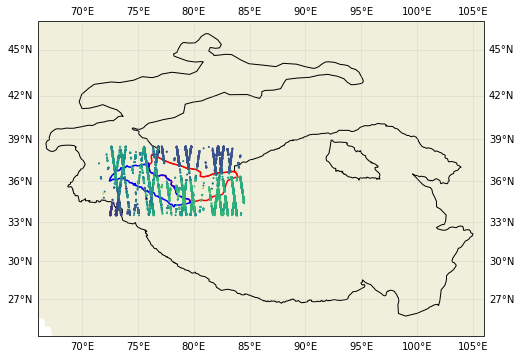

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))

ax.set_extent([66, 106, 24.0, 45.0])
ax.add_feature(cfeature.LAND); 
# ax.add_feature(cfeature.LAKES); ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-1 data
ax.scatter(x=lon_glas14, y=lat_glas14, c=h_glas14, s=1, transform=ccrs.PlateCarree(), zorder=0)



### 2. Local view (full-region/one-year)

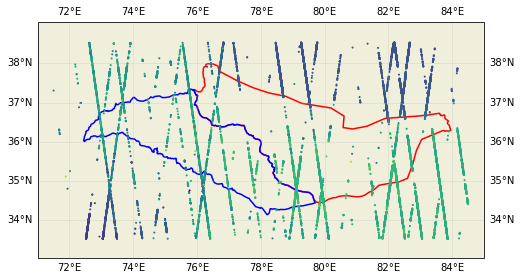

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([71, 85, 33.0, 39.0])
# ax.set_extent([77, 78, 36.0, 37.0])  ## 1 tile check
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-1 data
ax.scatter(x=lon_glas14, y=lat_glas14, c=h_glas14, s=1, transform=ccrs.PlateCarree(), zorder=0)



### 2. Local view (one-tile/one-year)

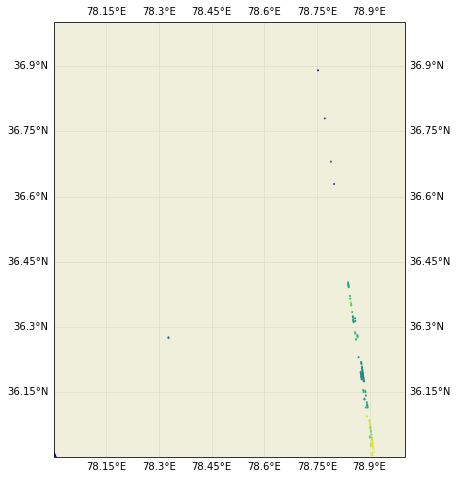

In [31]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# ax.set_extent([71, 85, 33.0, 39.0])
ax.set_extent([78, 79, 36.0, 37.0])  ## 1 tile check
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. icesat-1 data
ax.scatter(x=lon_glas14_tile, y=lat_glas14_tile, c=h_glas14_tile, s=1, transform=ccrs.PlateCarree(), zorder=0)

